# CIFAR-10 Handwritten Digit Recognition with CNN

Author: [1chooo](https://1chooo.com)

### Import the package and the dataset

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

2024-09-24 18:04:01.414770: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def build_model(optimizer='adam'):
    
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    
    return model

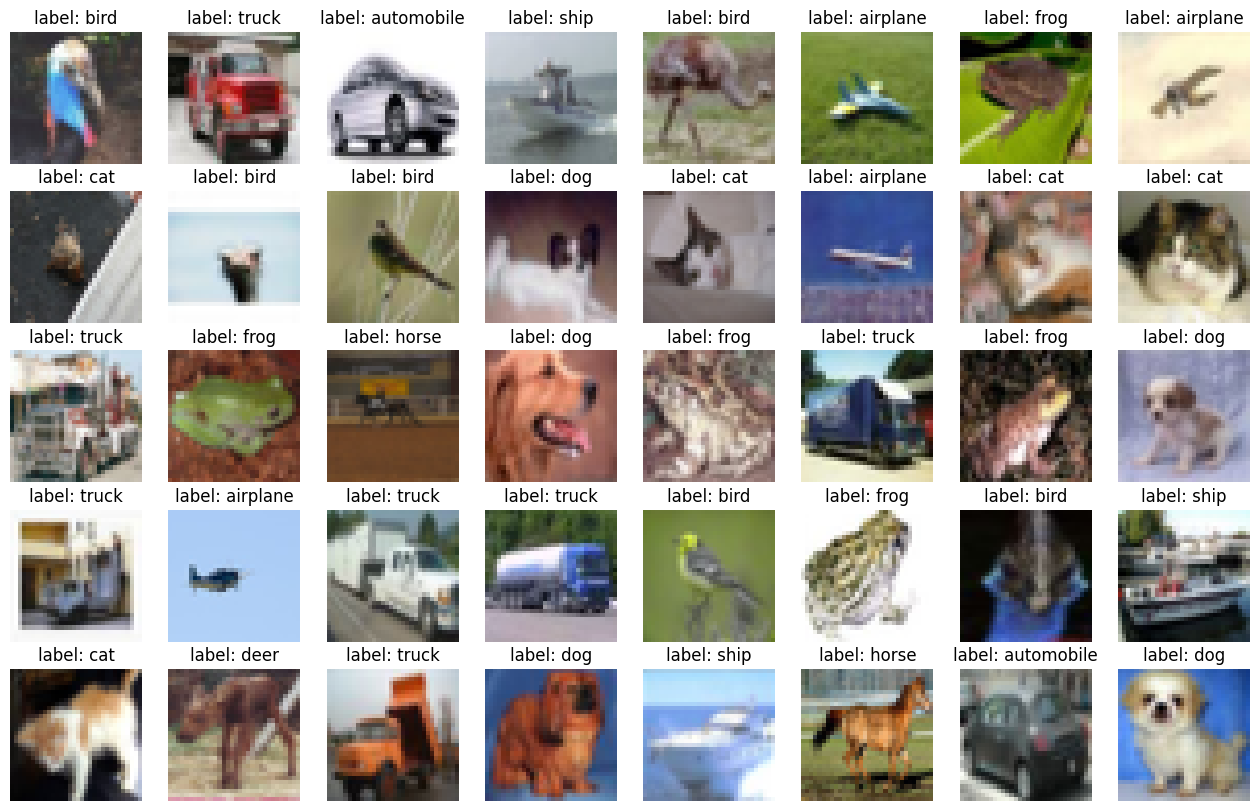

In [8]:
import matplotlib.pyplot as plt # pip install matplotlib
from random import randrange

text = [
	'airplane', 
	'automobile',
	'bird' ,
	'cat', 
	'deer', 
	'dog', 
	'frog', 
	'horse', 
	'ship', 
	'truck'
]

plt.figure(figsize=(16, 10), facecolor='w')

for i in range(5):
	for j in range(8):
		index = randrange(0, 50000)
		plt.subplot(5, 8, i * 8 + j + 1)
		plt.title("label: {}".format(text[train_labels[index][0]]))
		plt.imshow(train_images[index])
		plt.axis('off')

plt.show()

In [4]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20, 
    validation_data=(test_images, test_labels)
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

/Users/hugolin/Developer/ai/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.3660 - loss: 1.7244 - val_accuracy: 0.5551 - val_loss: 1.2354
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5806 - loss: 1.1701 - val_accuracy: 0.6345 - val_loss: 1.0342
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6498 - loss: 0.9998 - val_accuracy: 0.6697 - val_loss: 0.9459
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6857 - loss: 0.8950 - val_accuracy: 0.6878 - val_loss: 0.9085
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7143 - loss: 0.8160 - val_accuracy: 0.6930 - val_loss: 0.8843
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7362 - loss: 0.7516 - val_accuracy: 0.7051 - val_loss: 0.8545
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7593 - loss: 0.6860 - val_accuracy: 0.7045 - val_loss: 0.8565
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7676 -

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [14]:
def plot_training_history(history) -> None:
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), facecolor='w')  # Create 2 subplots

    # First plot for accuracy
    ax1.plot(history.history["accuracy"], label="train accuracy")
    ax1.plot(history.history["val_accuracy"], label="test accuracy")
    ax1.set_title("Model Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Epoch")
    ax1.legend(loc="upper left")

    # Second plot for loss
    ax2.plot(history.history["loss"], label="train loss")
    ax2.plot(history.history["val_loss"], label="test loss")
    ax2.set_title("Model Loss")
    ax2.set_ylabel("Loss")
    ax2.set_xlabel("Epoch")
    ax2.legend(loc="upper left")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


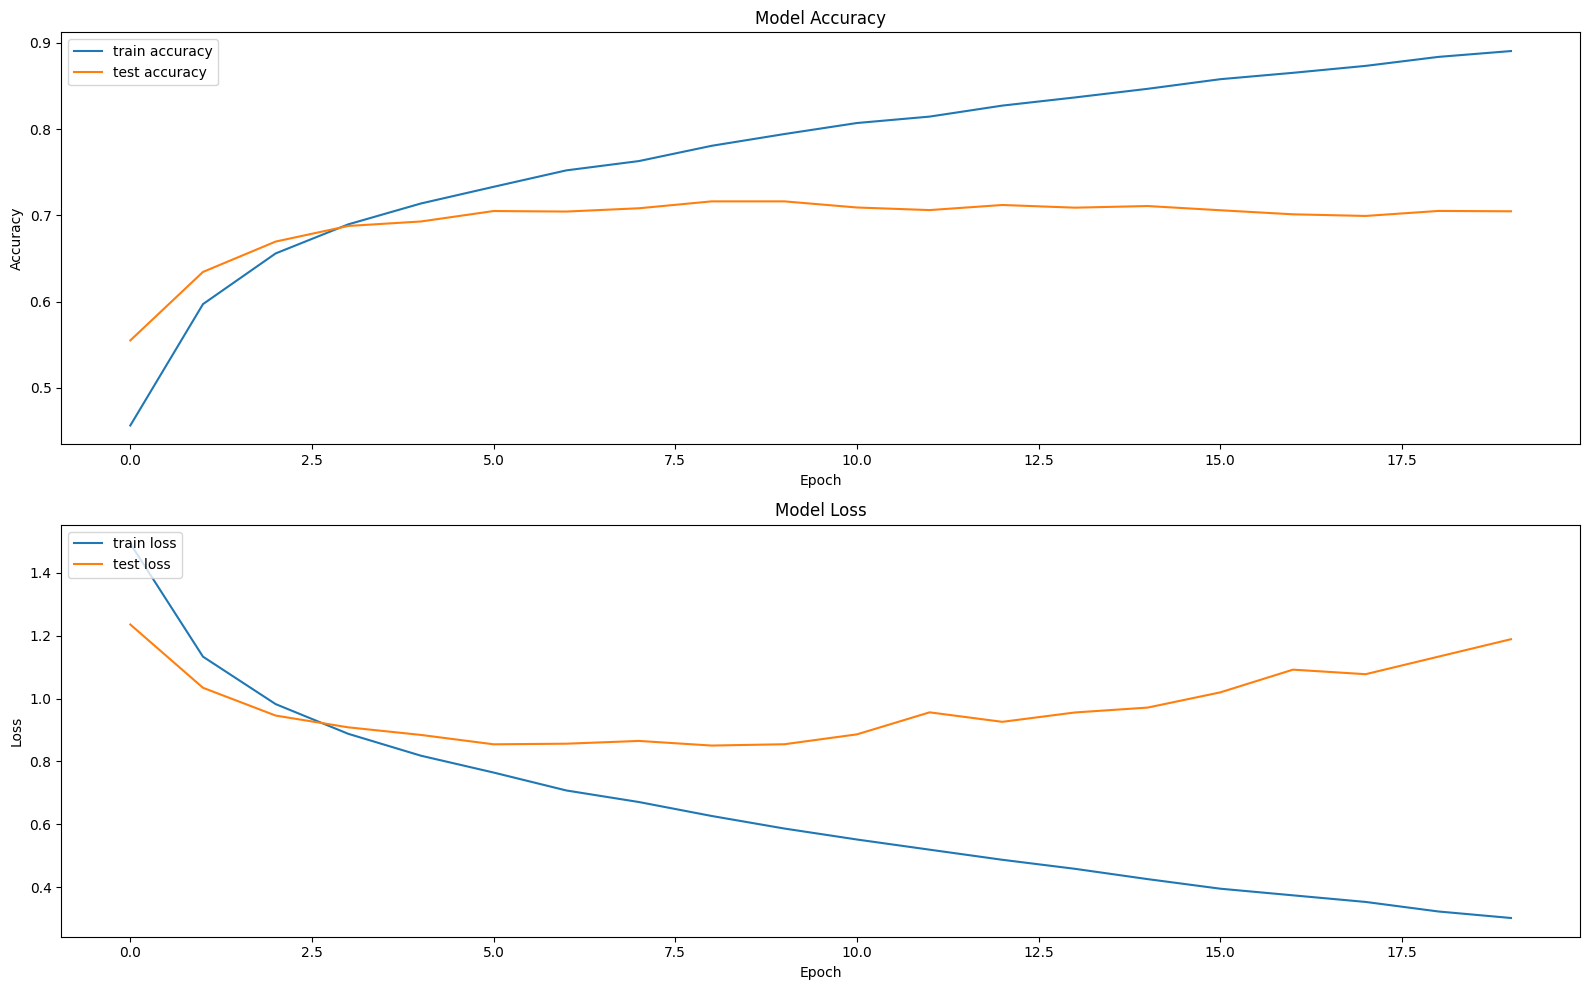

In [15]:
plot_training_history(history)

In [16]:
def show_test_accuracy(test_acc):
	print(f"Test accuracy: {test_acc}")

In [17]:
show_test_accuracy(test_acc)

Test accuracy: 0.704800009727478


We find in the last figure, after 5 epochs, the test accuracy is not increasing anymore. Also the test loss keep increasing. This is a sign of overfitting. We can try to make our `epoch` smaller to see if the model can generalize better.

In [27]:
model = build_model()

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=7, 
    validation_data=(test_images, test_labels),
)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.3371 - loss: 1.8019 - val_accuracy: 0.4761 - val_loss: 1.5225
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5844 - loss: 1.1929 - val_accuracy: 0.6346 - val_loss: 1.0306
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6583 - loss: 0.9784 - val_accuracy: 0.6557 - val_loss: 1.0235
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7005 - loss: 0.8635 - val_accuracy: 0.6847 - val_loss: 0.9242
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7346 - loss: 0.7697 - val_accuracy: 0.6854 - val_loss: 0.9047
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7564 - loss: 0.7054 - val_accuracy: 0.7018 - val_loss: 0.8903
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7753 - loss: 0.6426 - val_accuracy: 0.6859 - val_loss: 0.9379
313/313 - 2s - 6ms/step - accuracy: 0.6859 - loss: 0.9379


In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

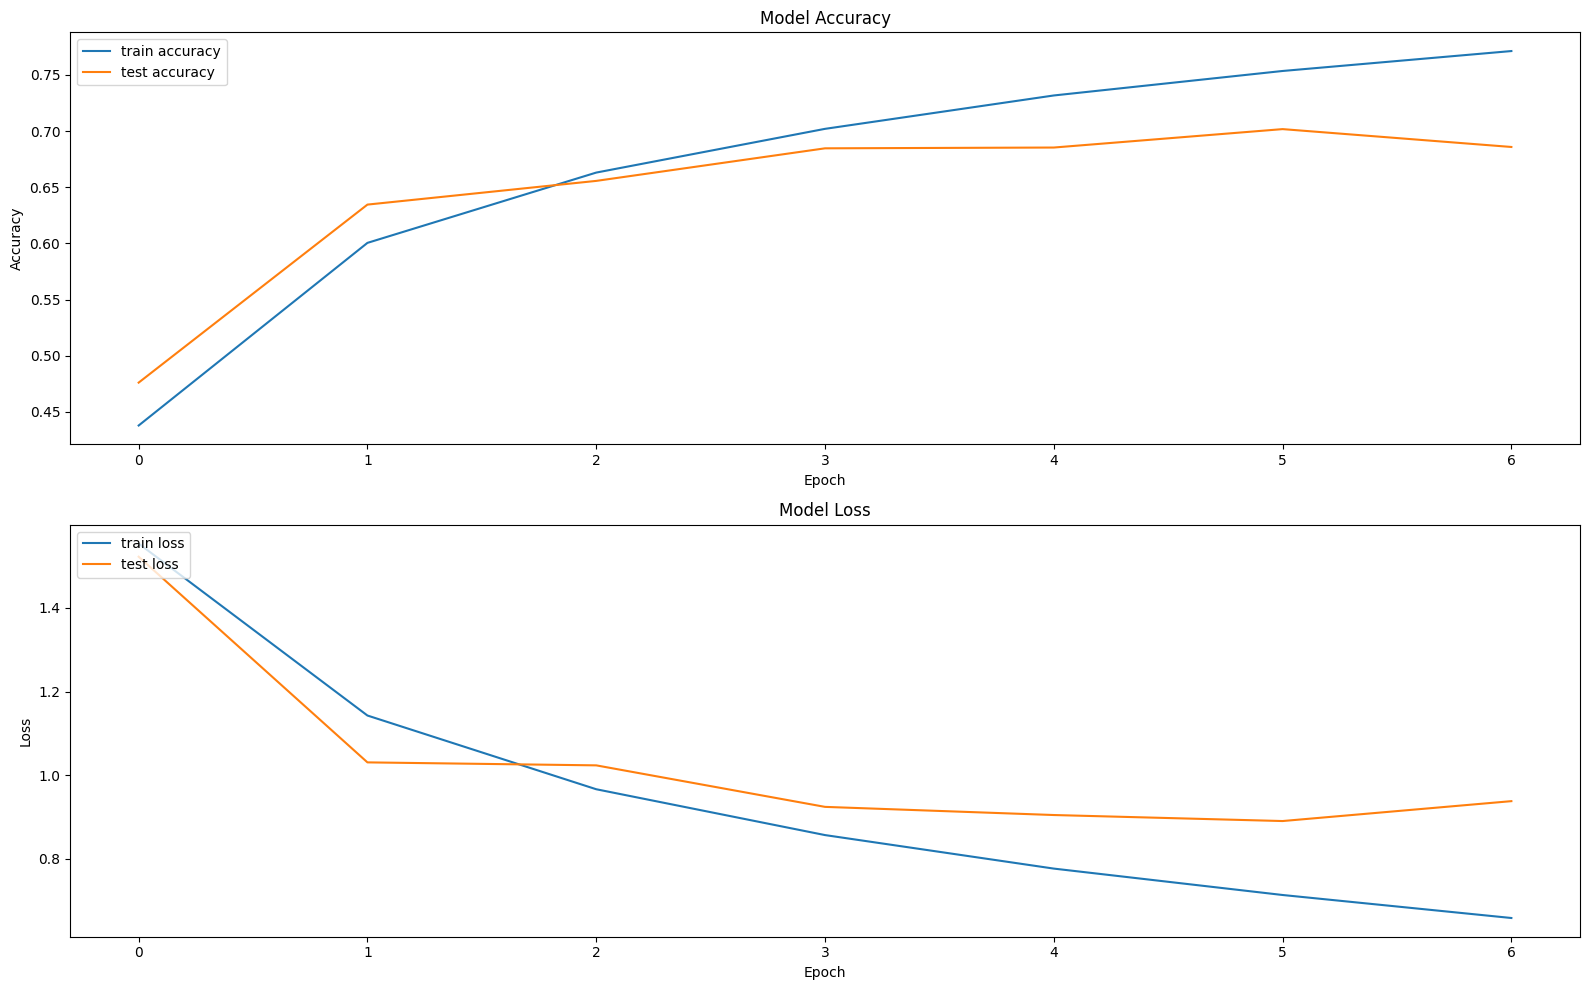

In [29]:
plot_training_history(history)

In [30]:
show_test_accuracy(test_acc)

Test accuracy: 0.6858999729156494


The result is what we expected. We stop training before the model overfits the training data. The test accuracy is 0.68, just only 0.02 lower than the previous model.

We change the optimizer to `rmsprop` and increase the number of epochs to 10, and set the batch size to 50.

In [24]:
model = build_model(optimizer='rmsprop')

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels),
    batch_size=50
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.3162 - loss: 1.8630 - val_accuracy: 0.5209 - val_loss: 1.3102
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.5421 - loss: 1.2816 - val_accuracy: 0.6132 - val_loss: 1.0911
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.6269 - loss: 1.0525 - val_accuracy: 0.6372 - val_loss: 1.0363
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.6780 - loss: 0.9138 - val_accuracy: 0.6673 - val_loss: 0.9511
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.7128 - loss: 0.8153 - val_accuracy: 0.7058 - val_loss: 0.8514
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.7438 - loss: 0.7433 - val_accuracy: 0.7039 - val_loss: 0.8764
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.7625 - loss: 0.6818 - val_accuracy: 0.6951 - val_loss: 0.8991
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.7870 -

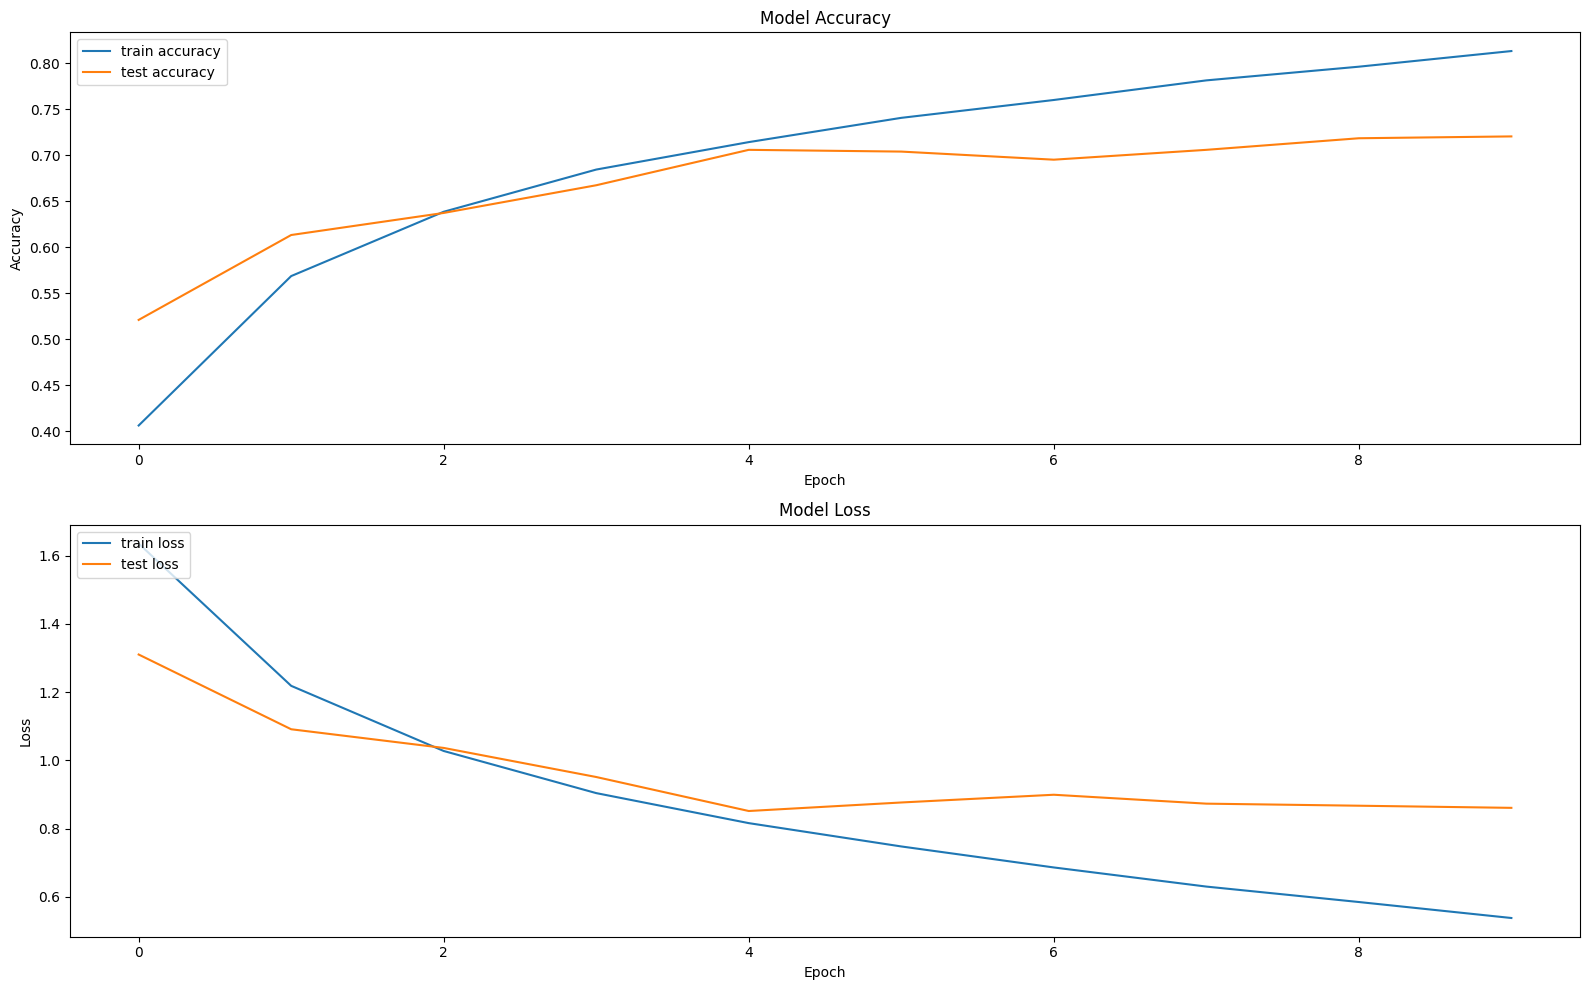

In [25]:
plot_training_history(history)

In [26]:
show_test_accuracy(test_acc)

Test accuracy: 0.7203999757766724


**Below are the experiments I have conducted:**
- epoches: from 20 -> 7.
- batch_size: from 100 -> 50.
- optimizer: adam and rmsprop.